HW1 - Real Time Machine Learning
Jacob Barker
801075553

Problem 1a: train the model from scratch (with randomized parameters) and plot the results (training loss and accuracy, validation accuracy) after 20 epochs. Does your network need more epochs for full training? Do you observe overfitting? Make sure to save the trained parameters and model.  (10pts)

(60000, 28, 28)
Epoch 1/20


2023-02-08 18:16:16.076708: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 156800000 exceeds 10% of free system memory.
2023-02-08 18:16:16.182285: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 156800000 exceeds 10% of free system memory.


3125/3125 [==============================] - 6s 2ms/step - loss: 1.5197 - accuracy: 0.4644 - val_loss: 0.8125 - val_accuracy: 0.6851
Epoch 2/20
3125/3125 [==============================] - 5s 2ms/step - loss: 0.6961 - accuracy: 0.7462 - val_loss: 0.6179 - val_accuracy: 0.7717
Epoch 3/20
3125/3125 [==============================] - 5s 2ms/step - loss: 0.5618 - accuracy: 0.7962 - val_loss: 0.5964 - val_accuracy: 0.7923
Epoch 4/20
3125/3125 [==============================] - 5s 2ms/step - loss: 0.5051 - accuracy: 0.8191 - val_loss: 0.4884 - val_accuracy: 0.8239
Epoch 5/20
3125/3125 [==============================] - 5s 2ms/step - loss: 0.4608 - accuracy: 0.8365 - val_loss: 0.4481 - val_accuracy: 0.8396
Epoch 6/20
3125/3125 [==============================] - 5s 2ms/step - loss: 0.4249 - accuracy: 0.8476 - val_loss: 0.4152 - val_accuracy: 0.8527
Epoch 7/20
3125/3125 [==============================] - 5s 2ms/step - loss: 0.3986 - accuracy: 0.8579 - val_loss: 0.4391 - val_accuracy: 0.8436
Epo

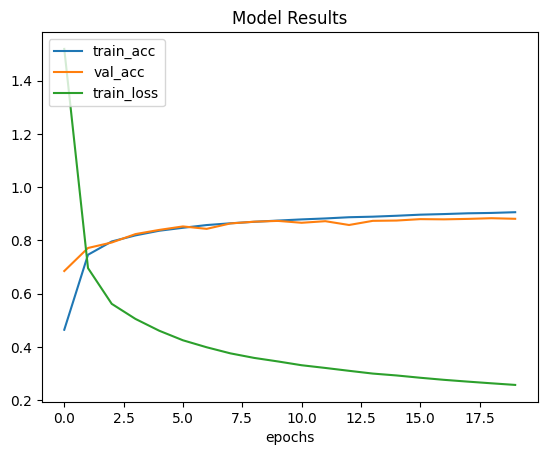

In [2]:
import torch
from torch import nn
from torch.nn import functional as F
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import Input, layers
import pandas as pd
from d2l import tensorflow as d2l


(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#scaling image values
train_images = train_images / 255
test_images = test_images / 255
print(train_images.shape)

x_val = train_images[-10000:]
y_val = train_labels[-10000:]

x_train = train_images[:-10000]
y_train = train_labels[:-10000]


#My Model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256, activation='relu',
        kernel_initializer=tf.random_normal_initializer(mean=0, stddev=0.01),
        bias_initializer=tf.zeros_initializer()),
    tf.keras.layers.Dense(128, activation='relu', 
        kernel_initializer=tf.random_normal_initializer(mean=0, stddev=0.01),
        bias_initializer=tf.zeros_initializer()),
    tf.keras.layers.Dense(64, activation='relu', 
        kernel_initializer=tf.random_normal_initializer(mean=0, stddev=0.01),
        bias_initializer=tf.zeros_initializer()),
    tf.keras.layers.Dense(10) ])

#Compile the model
model.compile(optimizer='SGD', 
        loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=['accuracy'])

#Train Model
history = model.fit(x_train, y_train, batch_size=16, epochs=20, validation_data=(x_val, y_val))

model.save_weights('BaseModel.params')

print(history.history.keys())

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.title('Model Results')
plt.xlabel('epochs')
plt.legend(['train_acc', 'val_acc', 'train_loss'], loc = 'upper left')
plt.show()

1.b Report section a; this time add weight penalties (weight decays). Report and plot your training results. how do the training results change compared to the baseline? (15pts)

Epoch 1/20


2023-02-08 18:17:53.858732: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 156800000 exceeds 10% of free system memory.


3125/3125 [==============================] - 5s 2ms/step - loss: 1.8018 - accuracy: 0.3833 - val_loss: 1.1045 - val_accuracy: 0.6636
Epoch 2/20
3125/3125 [==============================] - 5s 2ms/step - loss: 0.9763 - accuracy: 0.7115 - val_loss: 0.9044 - val_accuracy: 0.7175
Epoch 3/20
3125/3125 [==============================] - 5s 2ms/step - loss: 0.8686 - accuracy: 0.7459 - val_loss: 0.8550 - val_accuracy: 0.7532
Epoch 4/20
3125/3125 [==============================] - 5s 2ms/step - loss: 0.8214 - accuracy: 0.7634 - val_loss: 0.7925 - val_accuracy: 0.7797
Epoch 5/20
3125/3125 [==============================] - 5s 2ms/step - loss: 0.7789 - accuracy: 0.7827 - val_loss: 0.7544 - val_accuracy: 0.7974
Epoch 6/20
3125/3125 [==============================] - 5s 2ms/step - loss: 0.7412 - accuracy: 0.7997 - val_loss: 0.7416 - val_accuracy: 0.8018
Epoch 7/20
3125/3125 [==============================] - 5s 2ms/step - loss: 0.7231 - accuracy: 0.8055 - val_loss: 0.7133 - val_accuracy: 0.8099
Epo

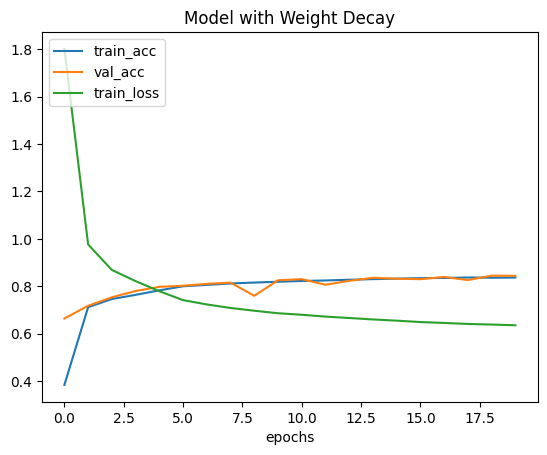

In [3]:
#******************************88
#Model 2 with WeightDecay
model_weightdecay = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256, activation='relu', 
        kernel_regularizer='l2', 
        kernel_initializer=tf.random_normal_initializer(mean=0, stddev=0.01),
        bias_initializer=tf.zeros_initializer()),
    tf.keras.layers.Dense(128, activation='relu', 
        kernel_regularizer='l2', 
        kernel_initializer=tf.random_normal_initializer(mean=0, stddev=0.01),
        bias_initializer=tf.zeros_initializer()),
    tf.keras.layers.Dense(64, activation='relu', 
        kernel_regularizer='l2', 
        kernel_initializer=tf.random_normal_initializer(mean=0, stddev=0.01),
        bias_initializer=tf.zeros_initializer()),
    tf.keras.layers.Dense(10) ])

model_weightdecay.compile(optimizer='SGD',
        loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=['accuracy'])

history = model_weightdecay.fit(x_train, y_train, batch_size=16, epochs=20, validation_data=(x_val, y_val))

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.title('Model with Weight Decay')
plt.xlabel('epochs')
plt.legend(['train_acc', 'val_acc', 'train_loss'], loc = 'upper left')
plt.show()

1.c Report section a; this time add dropout (dropout = 0.3). Report and plot your training results. how do the training results change compared to the baseline? How the training results change compared to the weight penalties. (15pts)

Epoch 1/20
3125/3125 [==============================] - 6s 2ms/step - loss: 1.6762 - accuracy: 0.3702 - val_loss: 0.8715 - val_accuracy: 0.6867
Epoch 2/20
3125/3125 [==============================] - 5s 2ms/step - loss: 0.8320 - accuracy: 0.6915 - val_loss: 0.6481 - val_accuracy: 0.7752
Epoch 3/20
3125/3125 [==============================] - 5s 2ms/step - loss: 0.6796 - accuracy: 0.7547 - val_loss: 0.5647 - val_accuracy: 0.7917
Epoch 4/20
3125/3125 [==============================] - 5s 2ms/step - loss: 0.6108 - accuracy: 0.7778 - val_loss: 0.5174 - val_accuracy: 0.8044
Epoch 5/20
3125/3125 [==============================] - 5s 2ms/step - loss: 0.5633 - accuracy: 0.7949 - val_loss: 0.5002 - val_accuracy: 0.8090
Epoch 6/20
3125/3125 [==============================] - 5s 2ms/step - loss: 0.5327 - accuracy: 0.8058 - val_loss: 0.4686 - val_accuracy: 0.8241
Epoch 7/20
3125/3125 [==============================] - 5s 2ms/step - loss: 0.5047 - accuracy: 0.8191 - val_loss: 0.4443 - val_accuracy:

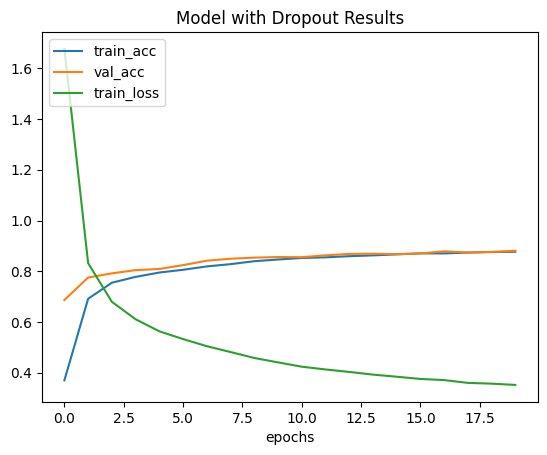

In [4]:
#******************************88
#Model 3 with dropout
model_dropout = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256, activation='relu', 
        kernel_initializer=tf.random_normal_initializer(mean=0, stddev=0.01),
        bias_initializer=tf.zeros_initializer()),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128, activation='relu', 
        kernel_initializer=tf.random_normal_initializer(mean=0, stddev=0.01),
        bias_initializer=tf.zeros_initializer()),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu', 
        kernel_initializer=tf.random_normal_initializer(mean=0, stddev=0.01),
        bias_initializer=tf.zeros_initializer()),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(10) ])

model_dropout.compile(optimizer='SGD',
        loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=['accuracy'])

history = model_dropout.fit(x_train, y_train, batch_size=16, epochs=20, validation_data=(x_val, y_val))

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.title('Model with Dropout Results')
plt.xlabel('epochs')
plt.legend(['train_acc', 'val_acc', 'train_loss'], loc = 'upper left')
plt.show()

1.d. repeat problems 1.b and 1.c; this time, load the pre-trained parameters from the storage. Plot the training results, and compare the training time and number of epochs needed against 1.b and 1.c. (20pts)

Epoch 1/20
3125/3125 [==============================] - 5s 2ms/step - loss: 1.3202 - accuracy: 0.8963 - val_loss: 0.9945 - val_accuracy: 0.8650
Epoch 2/20
3125/3125 [==============================] - 5s 2ms/step - loss: 0.8341 - accuracy: 0.8693 - val_loss: 0.7730 - val_accuracy: 0.8521
Epoch 3/20
3125/3125 [==============================] - 5s 2ms/step - loss: 0.7205 - accuracy: 0.8559 - val_loss: 0.7195 - val_accuracy: 0.8420
Epoch 4/20
3125/3125 [==============================] - 5s 2ms/step - loss: 0.6823 - accuracy: 0.8498 - val_loss: 0.6811 - val_accuracy: 0.8464
Epoch 5/20
3125/3125 [==============================] - 5s 2ms/step - loss: 0.6661 - accuracy: 0.8473 - val_loss: 0.7833 - val_accuracy: 0.7948
Epoch 6/20
3125/3125 [==============================] - 5s 2ms/step - loss: 0.6547 - accuracy: 0.8461 - val_loss: 0.6558 - val_accuracy: 0.8458
Epoch 7/20
3125/3125 [==============================] - 5s 2ms/step - loss: 0.6490 - accuracy: 0.8460 - val_loss: 0.6263 - val_accuracy:

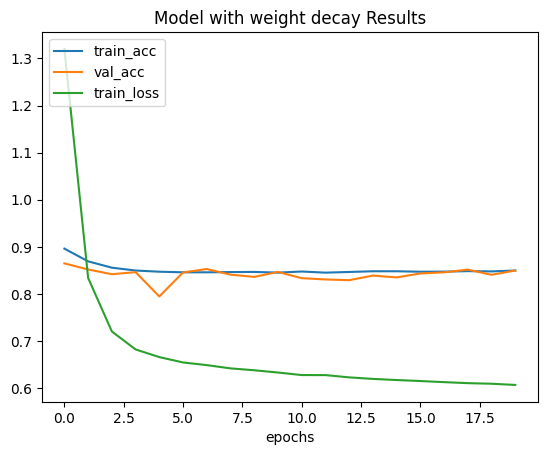

In [5]:
#********************************************************************
#Model 2(Weight Decay) with preloaded weights from saved base model

model_weightdecay.load_weights('BaseModel.params')

model_weightdecay.compile(optimizer='SGD',
        loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=['accuracy'])

history = model_weightdecay.fit(x_train, y_train, batch_size=16, epochs=20, validation_data=(x_val, y_val))

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.title('Model with weight decay Results')
plt.xlabel('epochs')
plt.legend(['train_acc', 'val_acc', 'train_loss'], loc = 'upper left')
plt.show()

Epoch 1/20
3125/3125 [==============================] - 5s 2ms/step - loss: 0.4481 - accuracy: 0.8468 - val_loss: 0.3411 - val_accuracy: 0.8786
Epoch 2/20
3125/3125 [==============================] - 5s 2ms/step - loss: 0.3893 - accuracy: 0.8677 - val_loss: 0.3381 - val_accuracy: 0.8812
Epoch 3/20
3125/3125 [==============================] - 5s 2ms/step - loss: 0.3659 - accuracy: 0.8753 - val_loss: 0.3225 - val_accuracy: 0.8860
Epoch 4/20
3125/3125 [==============================] - 5s 2ms/step - loss: 0.3550 - accuracy: 0.8763 - val_loss: 0.3261 - val_accuracy: 0.8865
Epoch 5/20
3125/3125 [==============================] - 5s 2ms/step - loss: 0.3427 - accuracy: 0.8819 - val_loss: 0.3192 - val_accuracy: 0.8877
Epoch 6/20
3125/3125 [==============================] - 5s 2ms/step - loss: 0.3360 - accuracy: 0.8845 - val_loss: 0.3565 - val_accuracy: 0.8751
Epoch 7/20
3125/3125 [==============================] - 5s 2ms/step - loss: 0.3302 - accuracy: 0.8857 - val_loss: 0.3205 - val_accuracy:

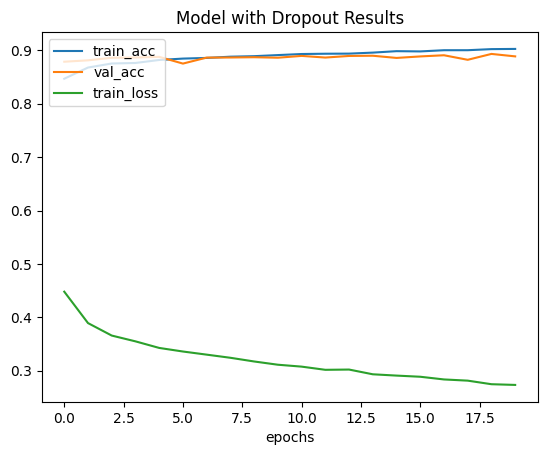

In [6]:
#************************************************************************
#Model 3 (Dropout) with preloaded weights from saved base model
model_dropout.load_weights('BaseModel.params')

model_dropout.compile(optimizer='SGD',
        loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=['accuracy'])

history = model_dropout.fit(x_train, y_train, batch_size=16, epochs=20, validation_data=(x_val, y_val))

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.title('Model with Dropout Results')
plt.xlabel('epochs')
plt.legend(['train_acc', 'val_acc', 'train_loss'], loc = 'upper left')
plt.show()


average validation log mse = 0.1243840836547315


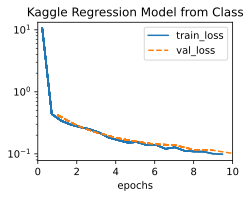

In [12]:
#PART 2
#************************************************************************
#Code from book: for reference on my own model

class KaggleHouse(d2l.DataModule):
    def __init__(self, batch_size, train=None, val=None):
        super().__init__()
        self.save_hyperparameters()
        if self.train is None:
            self.raw_train = pd.read_csv(d2l.download(
                d2l.DATA_URL + 'kaggle_house_pred_train.csv', self.root,
                sha1_hash='585e9cc93e70b39160e7921475f9bcd7d31219ce'))
            self.raw_val = pd.read_csv(d2l.download(
                d2l.DATA_URL + 'kaggle_house_pred_test.csv', self.root,
                sha1_hash='fa19780a7b011d9b009e8bff8e99922a8ee2eb90'))

data = KaggleHouse(batch_size=32)
print(data.raw_train.shape)
print(data.raw_val.shape)

@d2l.add_to_class(KaggleHouse)
def preprocess(self):
    # Remove the ID and label columns
    label = 'SalePrice'
    features = pd.concat(
        (self.raw_train.drop(columns=['Id', label]),
         self.raw_val.drop(columns=['Id'])))
    # Standardize numerical columns
    numeric_features = features.dtypes[features.dtypes != 'object'].index
    features[numeric_features] = features[numeric_features].apply(
        lambda x: (x - x.mean()) / (x.std()))
    # Replace NAN numerical features by 0
    features[numeric_features] = features[numeric_features].fillna(0)
    # Replace discrete features by one-hot encoding.
    features = pd.get_dummies(features, dummy_na=True)
    # Save preprocessed features
    self.train = features[:self.raw_train.shape[0]].copy()
    self.train[label] = self.raw_train[label]
    self.val = features[self.raw_train.shape[0]:].copy()

data.preprocess()
print(data.train.shape)


@d2l.add_to_class(KaggleHouse)
def get_dataloader(self, train):
    label = 'SalePrice'
    data = self.train if train else self.val
    if label not in data: return
    get_tensor = lambda x: tf.constant(x.values, dtype=tf.float32)
    # Logarithm of prices
    tensors = (get_tensor(data.drop(columns=[label])),  # X
               tf.reshape(tf.math.log(get_tensor(data[label])), (-1, 1)))  # Y
    return self.get_tensorloader(tensors, train)

def k_fold_data(data, k):
    rets = []
    fold_size = data.train.shape[0] // k
    for j in range(k):
        idx = range(j * fold_size, (j+1) * fold_size)
        rets.append(KaggleHouse(data.batch_size, data.train.drop(index=idx),
                                data.train.loc[idx]))
    return rets

def k_fold(trainer, data, k, lr):
    val_loss, models = [], []
    for i, data_fold in enumerate(k_fold_data(data, k)):
        model = d2l.LinearRegression(lr)
        model.board.yscale='log'
        if i != 0: model.board.display = False
        trainer.fit(model, data_fold)
        val_loss.append(float(model.board.data['val_loss'][-1].y))
        models.append(model)
    print(f'average validation log mse = {sum(val_loss)/len(val_loss)}')
    return models


trainer = d2l.Trainer(max_epochs=10)
models = k_fold(trainer, data, k=5, lr=0.01)
plt.title("Kaggle Regression Model from Class")
plt.xlabel("epochs")
plt.show() #Shows plot of original model that we used in class


2.b Improve the score by improving the model complexity. Please plot the training results and compare them against the baseline model we did in the lectures. How about the model complexity comparison and training time? (15pt)

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
average validation log mse = 0.028646419681608675


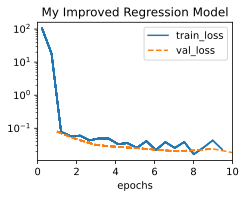

In [14]:
#**********************************************************************************88
#My more complex defined model uses a fully connected netwoork with 3 hidden layers
class MyModel(d2l.Module):  #@save
    def __init__(self, lr):
        super().__init__()
        self.save_hyperparameters()
        initializer = tf.initializers.RandomNormal(stddev=0.01)
        strategy = tf.distribute.MirroredStrategy()
        with strategy.scope():
            self.net = tf.keras.Sequential([
                tf.keras.layers.Dense(256, kernel_initializer=initializer, activation='relu'),
                tf.keras.layers.Dense(128, kernel_initializer=initializer, activation='relu'),
                tf.keras.layers.Dense(64, kernel_initializer=initializer, activation='relu'),
                tf.keras.layers.Dense(1, kernel_initializer=initializer)])
    def forward(self, X):
        return self.net(X)

    def loss(self, y_hat, y):
        fn = tf.keras.losses.MeanSquaredError()
        return fn(y, y_hat)

    def configure_optimizers(self):
        return tf.keras.optimizers.SGD(self.lr)

#new k-fold function calling my new model
def new_k_fold(trainer, data, k, lr):
    val_loss, models = [], []
    for i, data_fold in enumerate(k_fold_data(data, k)):
        model = MyModel(lr)
        model.board.yscale='log'
        if i != 0: model.board.display = False
        trainer.fit(model, data_fold)
        val_loss.append(float(model.board.data['val_loss'][-1].y))
        models.append(model)
    print(f'average validation log mse = {sum(val_loss)/len(val_loss)}')
    return models

trainer = d2l.Trainer(max_epochs=10)
models = new_k_fold(trainer, data, k=5, lr=0.01)
plt.title("My Improved Regression Model")
plt.xlabel("epochs")
plt.show() #plot of my models performance

In [9]:
preds = [model(tf.constant(data.val.values, dtype=tf.float32))
         for model in models]
# Taking exponentiation of predictions in the logarithm scale
ensemble_preds = tf.reduce_mean(tf.exp(tf.concat(preds, 1)), 1)
submission = pd.DataFrame({'Id':data.raw_val.Id,
                           'SalePrice':ensemble_preds.numpy()})
submission.to_csv('submission.csv', index=False)

2.c How about exploring options for weight decay and dropout over the more complex model? Please plot the results and compare them against 2.b (10pt)

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
average validation log mse = 0.051890302915126085


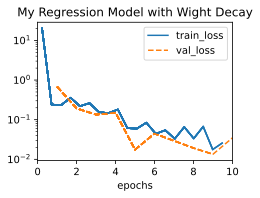

In [10]:
#*******************************************************************************************
#Trying the regression with a model using weight decay.

class MyModelWeightDecay(d2l.Module):  #@save
    def __init__(self, lr):
        super().__init__()
        self.save_hyperparameters()
        initializer = tf.initializers.RandomNormal(stddev=0.01)
        strategy = tf.distribute.MirroredStrategy()
        with strategy.scope():
            self.net = tf.keras.Sequential([
                tf.keras.layers.Dense(256, kernel_regularizer='l2', kernel_initializer=initializer, activation='relu'),
                tf.keras.layers.Dense(128, kernel_regularizer='l2', kernel_initializer=initializer, activation='relu'),
                tf.keras.layers.Dense(64, kernel_regularizer='l2', kernel_initializer=initializer, activation='relu'),
                tf.keras.layers.Dense(1, kernel_initializer=initializer)])
    def forward(self, X):
        return self.net(X)

    def loss(self, y_hat, y):
        fn = tf.keras.losses.MeanSquaredError()
        return fn(y, y_hat)

    def configure_optimizers(self):
        return tf.keras.optimizers.SGD(self.lr)

#new k-fold function calling my new model
def new_k_fold_WeightDecay(trainer, data, k, lr):
    val_loss, models = [], []
    for i, data_fold in enumerate(k_fold_data(data, k)):
        model = MyModelWeightDecay(lr)
        model.board.yscale='log'
        if i != 0: model.board.display = False
        trainer.fit(model, data_fold)
        val_loss.append(float(model.board.data['val_loss'][-1].y))
        models.append(model)
    print(f'average validation log mse = {sum(val_loss)/len(val_loss)}')
    return models

trainer = d2l.Trainer(max_epochs=10)
models = new_k_fold_WeightDecay(trainer, data, k=5, lr=0.1)
plt.title("My Regression Model with Wight Decay")
plt.xlabel("epochs")
plt.show()


INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
average validation log mse = 0.030555543499067427


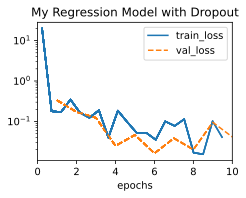

In [11]:
#*******************************************************************************************
#Trying the regression with a model using dropout.

class MyModelDropout(d2l.Module):  #@save
    def __init__(self, lr):
        super().__init__()
        self.save_hyperparameters()
        initializer = tf.initializers.RandomNormal(stddev=0.01)
        strategy = tf.distribute.MirroredStrategy()
        with strategy.scope():
            self.net = tf.keras.Sequential([
                tf.keras.layers.Dense(256, kernel_initializer=initializer, activation='relu'),
                tf.keras.layers.Dropout(0.3),
                tf.keras.layers.Dense(128, kernel_initializer=initializer, activation='relu'),
                tf.keras.layers.Dropout(0,3),
                tf.keras.layers.Dense(64, kernel_initializer=initializer, activation='relu'),
                tf.keras.layers.Dropout(0.3),
                tf.keras.layers.Dense(1, kernel_initializer=initializer)])
    def forward(self, X):
        return self.net(X)

    def loss(self, y_hat, y):
        fn = tf.keras.losses.MeanSquaredError()
        return fn(y, y_hat)

    def configure_optimizers(self):
        return tf.keras.optimizers.SGD(self.lr)

#new k-fold function calling my new model
def new_k_fold_Dropout(trainer, data, k, lr):
    val_loss, models = [], []
    for i, data_fold in enumerate(k_fold_data(data, k)):
        model = MyModelDropout(lr)
        model.board.yscale='log'
        if i != 0: model.board.display = False
        trainer.fit(model, data_fold)
        val_loss.append(float(model.board.data['val_loss'][-1].y))
        models.append(model)
    print(f'average validation log mse = {sum(val_loss)/len(val_loss)}')
    return models

trainer = d2l.Trainer(max_epochs=10)
models = new_k_fold_Dropout(trainer, data, k=5, lr=0.1)
plt.title("My Regression Model with Dropout")
plt.xlabel("epochs")
plt.show()
